# Task 1: Load the Dataset

In [5]:
import pandas as pd

df = pd.read_csv("/Users/omarm2/Downloads/sample_reviews.csv")
print(df.head())

   id                                             review
0   1           I love this product, it works perfectly!
1   2  Terrible experience, the item broke after two ...
2   3       Good value for money, but delivery was late.
3   4    Absolutely amazing service and product quality!
4   5         Not happy, customer support was unhelpful.


# Task 2: Basic Text Exploration

Print the number of reviews

Print the first review

Print the longest and shortest review (by character length)

In [10]:
print("Number of reviews:", len(df))
print("First review:", df['review'][0])
print("Longest review:", df['review'].apply(len).max())
print("Shortest review:", df['review'].apply(len).min())


Number of reviews: 5
First review: I love this product, it works perfectly!
Longest review: 51
Shortest review: 40


# Task 3: Text Cleaning

Convert to lowercase

Remove punctuation

Split into words

In [13]:
import string

def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    return words

df['cleaned_review'] = df['review'].apply(clean_text)
print(df.head())

   id                                             review  \
0   1           I love this product, it works perfectly!   
1   2  Terrible experience, the item broke after two ...   
2   3       Good value for money, but delivery was late.   
3   4    Absolutely amazing service and product quality!   
4   5         Not happy, customer support was unhelpful.   

                                      cleaned_review  
0     [i, love, this, product, it, works, perfectly]  
1  [terrible, experience, the, item, broke, after...  
2  [good, value, for, money, but, delivery, was, ...  
3  [absolutely, amazing, service, and, product, q...  
4    [not, happy, customer, support, was, unhelpful]  


# Task 4: Word Frequency Use Counter to get word frequencies across all reviews.

In [16]:
from collections import Counter

all_words = []
for words in df['cleaned_review']:
    all_words.extend(words)

word_counts = Counter(all_words)
print(word_counts.most_common(5))


[('product', 2), ('was', 2), ('i', 1), ('love', 1), ('this', 1)]


# Unique Words Count

Count the total number of unique words across all reviews

In [18]:
unique_words = set(all_words)
print("Number of unique words:", len(unique_words))


Number of unique words: 33


# Task 5: Clean Text with Regular Expressions
Goal: Remove unwanted characters (punctuation, numbers) using regex.

In [23]:
import re

def clean_with_regex(text):
    text = text.lower()                              # Lowercase
    text = re.sub(r'[^a-z\s]', '', text)             # Keep only letters and spaces
    words = text.split()
    return words

df['regex_cleaned_review'] = df['review'].apply(clean_with_regex)
print(df.head())


   id                                             review  \
0   1           I love this product, it works perfectly!   
1   2  Terrible experience, the item broke after two ...   
2   3       Good value for money, but delivery was late.   
3   4    Absolutely amazing service and product quality!   
4   5         Not happy, customer support was unhelpful.   

                                      cleaned_review  \
0     [i, love, this, product, it, works, perfectly]   
1  [terrible, experience, the, item, broke, after...   
2  [good, value, for, money, but, delivery, was, ...   
3  [absolutely, amazing, service, and, product, q...   
4    [not, happy, customer, support, was, unhelpful]   

                                regex_cleaned_review  
0     [i, love, this, product, it, works, perfectly]  
1  [terrible, experience, the, item, broke, after...  
2  [good, value, for, money, but, delivery, was, ...  
3  [absolutely, amazing, service, and, product, q...  
4    [not, happy, customer,

# Task 6: Word Frequency (with regex-cleaned text)

In [26]:
from collections import Counter

all_words = []
for words in df['regex_cleaned_review']:
    all_words.extend(words)

word_counts = Counter(all_words)
print("Most common words:", word_counts.most_common(5))


Most common words: [('product', 2), ('was', 2), ('i', 1), ('love', 1), ('this', 1)]


# Task 7: Pattern Matching with Regular Expressions
Use regex to:

Find all reviews that contain the word 'product'

Find all reviews starting with 'Not'

In [34]:
# Contains 'product'
contains_product = df[df['review'].str.contains(r'\bproduct\b', flags=re.IGNORECASE)]
print(contains_product)




   id                                           review  \
0   1         I love this product, it works perfectly!   
3   4  Absolutely amazing service and product quality!   

                                      cleaned_review  \
0     [i, love, this, product, it, works, perfectly]   
3  [absolutely, amazing, service, and, product, q...   

                                regex_cleaned_review  \
0     [i, love, this, product, it, works, perfectly]   
3  [absolutely, amazing, service, and, product, q...   

                                     cleaned_text  
0          i love this product it works perfectly  
3  absolutely amazing service and product quality  


In [36]:
# Starts with 'Not'
starts_with_not = df[df['review'].str.match(r'^Not', flags=re.IGNORECASE)]
print(starts_with_not)

   id                                      review  \
4   5  Not happy, customer support was unhelpful.   

                                    cleaned_review  \
4  [not, happy, customer, support, was, unhelpful]   

                              regex_cleaned_review  \
4  [not, happy, customer, support, was, unhelpful]   

                               cleaned_text  
4  not happy customer support was unhelpful  


# Task 8: Top TF-IDF Words
For each review, print the top 3 words based on TF-IDF scores

In [38]:
for i in range(len(df)):
    row = tfidf_df.iloc[i]
    top_words = row.sort_values(ascending=False).head(3)
    print(f"Review {i+1} top words:\n{top_words}\n")


Review 1 top words:
love    0.420669
it      0.420669
this    0.420669
Name: 0, dtype: float64

Review 2 top words:
experience    0.353553
terrible      0.353553
after         0.353553
Name: 1, dtype: float64

Review 3 top words:
value    0.361529
money    0.361529
but      0.361529
Name: 2, dtype: float64

Review 4 top words:
absolutely    0.420669
amazing       0.420669
and           0.420669
Name: 3, dtype: float64

Review 5 top words:
not          0.420669
support      0.420669
unhelpful    0.420669
Name: 4, dtype: float64



# Task 9: Generate a Word Cloud

In [44]:
#pip install wordcloud



[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


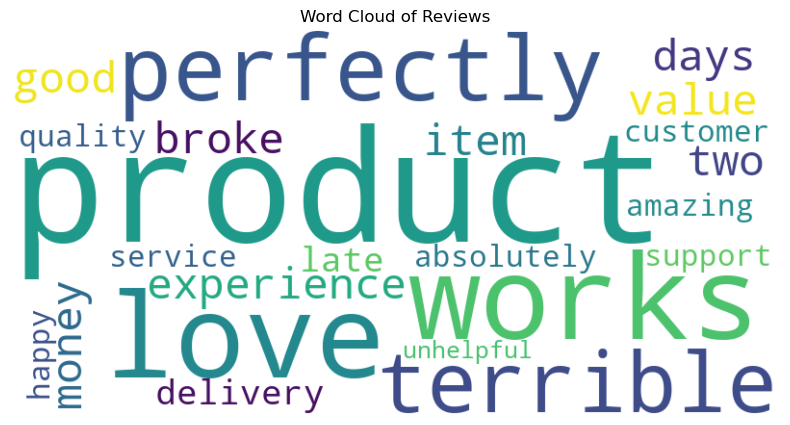

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all words into a single string
text_string = ' '.join(all_words)

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_string)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Reviews")
plt.show()


# Task 10: Stopword Frequency

In [52]:
import nltk
from nltk.corpus import stopwords

# Download stopwords (run this once)
nltk.download('stopwords')

# Get the list of English stopwords
stop_words = set(stopwords.words('english'))

# Now you can safely use stop_words
print(stop_words)




[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/omarm2/nltk_data...


{"weren't", 'over', 'yourselves', 'below', 'd', "shouldn't", 'did', 'in', 'what', 'its', 'other', 'an', "should've", "she's", 'should', "shan't", 'these', 'yours', 'those', 'won', 'we', 'shouldn', 'wouldn', 'all', 'again', 'does', 'ourselves', 're', 'don', "that'll", 'some', 'but', 'am', 'up', "they'll", "it'll", 'having', 'yourself', "haven't", "i've", 've', "mightn't", 'itself', 'then', 'the', "she'd", 'and', 'being', 'aren', "we've", 'their', 'into', 'ma', "hadn't", 'i', 'nor', 'will', 'to', "don't", 'has', 'no', 'wasn', 'do', 'mightn', 'while', "i'd", 'own', 'll', 'are', 'haven', "they're", "needn't", 'o', 'it', 'very', "didn't", 'was', 'been', 'or', 'out', 'mustn', 'themselves', "aren't", 'himself', 'me', "hasn't", 't', "they've", 'now', 'for', "it's", "we'd", 'at', 'both', 'than', "they'd", 'once', 'myself', 'shan', "she'll", 'weren', 'can', "he's", 'is', 'our', 'his', 'whom', "we'll", 'more', 'needn', 'theirs', "you'll", 'ours', 'be', "we're", 'your', 'they', 'when', 'about', 'a

[nltk_data]   Unzipping corpora/stopwords.zip.


In [54]:
stopword_counts = Counter(word for word in all_words if word in stop_words)
print(stopword_counts.most_common(10))

[('was', 2), ('i', 1), ('this', 1), ('it', 1), ('the', 1), ('after', 1), ('for', 1), ('but', 1), ('and', 1), ('not', 1)]
